# Python for Data Science Project Session 5: Economics and Finance

## Introduction


In this session, we will look at two mini projects related to Economics/Finance, applying techniques covered in Session Five and extending these a bit further. To start, we will import our general data science packages here, and then add the necessary machine learning imports as we go along so that it's clear when to use what: 

In [1]:
# Importing key data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convergence warning disabling
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter

simplefilter("ignore", category=ConvergenceWarning)

## Mini-Projects
> [Classification: Which companies go bust?](#Classification:-Which-companies-go-bust?)
>
> [Regression: What are the drivers of worker productivity?](#Regression:-What-are-the-drivers-of-worker-productivity?)


## Classification: Which companies go bust?
For this project, we will aim to predict if a company is likely to go bankrupt given a variety of accounting and financial metrics. To do this, we will use  data collected from the Taiwan Economic Journal for the years 1999 to 2009. This kind of model would have all sorts of real world applications, from portfolio stock picks to loan approvals.

### Data set overview

To start out, lets get an overview of our data set dimensions and feature types. We'll be doing a very simple overview in this section but feel free to perform more extensive EDA on your own: the more you know about your data, the better you can harness it through modelling.

Start out with the following tasks:
- Read in the data set as a pandas DataFrame (file path: `data/bankruptcy.csv`)
- Output the first five data set rows
- Print out a comprehensive summary of the data set (dimensions, variable names, data types, and null values)

In [2]:
# Read bankruptcy data set
data  = pd.read_csv('data/bankruptcy.csv')

In [3]:
# Output the first five rows
data.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
# Print the data set overview (dimensions, variable names, data types, null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### Our ML setup
To start our project we want to set up our data in the usual machine learning configuration: a training and a test set, each with its own feature matrix and target vector. To start:

- Import the `train_test_split()` function from scikit learn
- Declare a target vector y (corresponding to the `Bankrupt` column in the data set)
- Declare a feature matrix X (including all columns except `Bankrupt`)
- Create a training and test set
- Print the dimensions of X and y in both the training and test set.

In [5]:
# Importing train-test split function
from sklearn.model_selection import train_test_split

In [6]:
# Declare the target vector y which has the column label 'Bankrupt'
y = data.Bankrupt

In [7]:
# Declare feature matrix 
X = data.drop(columns='Bankrupt')

In [8]:
# Create a train-test- split using random state 253, test_size 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=253) 

In [9]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)

X_train dimensions:  (4773, 95)
y_train dimensions:  (4773,)


In [10]:
print('X_test dimensions: ', X_test.shape)
print('y_test dimensions: ', y_test.shape)

X_test dimensions:  (2046, 95)
y_test dimensions:  (2046,)


### Dimensionality reduction

One problem that is immediately apparent is that we have a high number of features in our data. This constitutes a problem as capturing the complexities of a highly dimensional space through our model can lead us to **overfitting**. 
> This is known as the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality#Machine_Learning) and is definitely a topic worth exploring further.


In order to cope with the high dimensionality of our data we can employ several dimensionality reduction techniques. The first one we'll explore is called **Principal Component Analysis (PCA)** and for a more in-depth treatment of the subject be sure to refer [here](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c). PCA essentially works by projecting our data points (which can be seen as vectors) into a lower dimensional space while maximizing the conserved variance of our data.

Try out PCA on the training feature matrix `X_train` below:
- Import the `PCA` class from the `sklearn.decomposition` module.
- Decide on a number for `n_components`. This is going to be the new number of features.
- Create a PCA transformer.
- Train the transformer using the `.fit()` method.
- Apply dimensionality reduction using the `.transform()` method.
- Output the first five rows.

> **Note:** The `.transform()` method will return a NumPy array as opposed to a pandas DataFrame.

In [11]:
# Importing PCA class
from sklearn.decomposition import PCA

In [12]:
# Create PCA transformer that keeps 30 components 
pca = PCA(n_components=30)

In [13]:
# Fit and transform using our PCA model
pca.fit(X_train)
X_red = pca.transform(X_train)
pd.DataFrame(X_red).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.523242e+09,-1.918231e+09,-1.232079e+09,-1.776376e+09,-2.241226e+09,-2.137455e+09,-1.284218e+09,-4.522613e+08,-1.019373e+08,-5.526863e+07,...,5.990670e+08,-9.863251e+05,-1.488518e+06,0.021262,-0.388106,0.039452,-0.105008,-0.000646,0.046449,0.058511
1,-3.190167e+09,-2.229378e+09,-1.542280e+09,-1.132694e+09,-3.550784e+09,-9.206884e+08,4.735889e+09,-7.588887e+08,-1.324696e+08,-8.904601e+06,...,-5.230878e+06,-1.021334e+06,-1.433085e+06,-0.309381,-0.336137,-0.021757,-0.073706,-0.018795,-0.031771,0.026735
2,3.923038e+08,-1.977646e+09,2.672523e+09,-3.915985e+09,1.047293e+09,-3.084126e+09,-3.835881e+08,-1.973793e+08,-7.613600e+07,-3.861154e+07,...,-1.456694e+07,-4.647027e+05,-1.496466e+06,-0.373196,0.290912,-0.039028,0.134702,0.152492,-0.015098,0.055837
3,2.002011e+09,4.168241e+09,-1.769392e+09,9.539553e+08,-3.003403e+09,2.583991e+09,-1.937712e+09,-4.011079e+09,-1.151520e+07,-7.186522e+07,...,-1.115475e+07,-8.677484e+05,-1.694474e+05,-0.091082,-0.308278,0.126775,0.032384,0.124902,0.021414,-0.095182
4,-1.895548e+09,-2.092054e+09,-1.279104e+09,-5.940138e+08,9.752376e+08,-2.481735e+09,-6.981636e+08,-3.100633e+08,-9.929031e+07,-3.954471e+07,...,-1.818691e+07,-1.373497e+06,-1.614229e+06,-0.168585,-0.031901,-0.240893,-0.036218,0.024268,-0.071079,0.135635


### Pipelines

You might've noticed that most machine learning with scikit learn involves:
- Instantiating a transformer or model.
- Fitting this to our data using `.fit()`.
- Transforming or predicting using `.transform()` or `.predict()`.

This simple, general process means that we can simplify our ML process using **Pipelines**. A Pipeline allows you to establish a sequence of transformations terminating with *one estimator*. Pipelines can then be treated as any other scikit learn estimator, but each time they perform all of the interim transformation steps in the sequence. This has the benefit of greatly simplifying your code and can also help prevent [data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/). 

To instantiate a Pipeline you must pass as an argument a list of $n+1$ tuples (where $n$ is the number of transforms) in the form: `[('transformer_1_name', transformer_1), ..., ('estimator_name', estimator)]`.

We will now create Pipelines for a KNN, SVM, and Logistic Regression model below:
- Import the `StandardScaler`, `KNeighborsClassifier`, `SVC`, and `LogisticRegression` classes from scikit learn.
- Import the `Pipeline` class from scikit learn.
- For each one of the three models, create a Pipeline with the following transforms (in order): scaling, PCA, estimator.

In [14]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [15]:
# Importing KNN, SVM, and Logistic Regression models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
# Combine these into three Pipelines, one for each model
knn_pipe = Pipeline([('Scaler', StandardScaler()), 
                     ('PCA', PCA(n_components=30)), 
                     ('Model', KNeighborsClassifier())])

svm_pipe = Pipeline([('Scaler', StandardScaler()), 
                     ('PCA', PCA(n_components=30)), 
                     ('Model', SVC())])

log_reg_pipe = Pipeline([('Scaler', StandardScaler()), 
                         ('PCA', PCA(n_components=30)), 
                         ('Model', LogisticRegression())])

### Alternative evaluation metrics

During Session Five, you were introduced to Accuracy as an evaluation metric for classification model. As a reminder, accuracy is defined as follows:
$$ \text{Accuracy} = \frac{TP+TN}{TP+FP+TN+FN}$$
In other words, it is the ratio of correctly classified samples to the overall number of samples. We're now gonna compute accuracy for our three models. To do this, we use the `cross_val_score()` function from scikit learn (for documentation, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score)). This function calculates the average score (taking accuracy as the default metric for classification models) after carrying out K-fold cross validation, which we prefer in order to reduce bias and thus get a more 'realistic' estimate of our model's performance. 

To start out, print the average accuracy score for each of our models:
- Import the `cross_val_score()` function from scikit learn.
- Calculate the cross-validated scores for each pipeline estimator.
- Print the mean score for each pipeline estimator.

In [18]:
# Importing cross_val_score
from sklearn.model_selection import cross_val_score

In [19]:
# Calculating mean cross-validated scores
knn_score = cross_val_score(knn_pipe, X_train, y_train).mean()
svm_score = cross_val_score(svm_pipe, X_train, y_train).mean()
log_reg_score = cross_val_score(log_reg_pipe, X_train, y_train).mean()

In [20]:
print('KNN Accuracy Score:')
print(knn_score)

KNN Accuracy Score:
0.9650114700297452


In [21]:
print('SVM Accuracy Score:')
print(svm_score)

SVM Accuracy Score:
0.9677348612071521


In [22]:
print('Logistic Regression Accuracy Score:')
print(log_reg_score)

Logistic Regression Accuracy Score:
0.9660585904485934


Although accuracy is a good starting point to illustrate our model's predictive performance, it does come with some caveats. This is perhaps better illustrated by an example:

>**Example:**
>
> *Imagine if I told you I can build a machine learning model that predicts whether or not an applicant is admitted into Harvard with 96.4% accuracy. Sounds good right! Now what if I told you the model works by predicting `NOT_ACCEPTED` to every applicant, irrespective of any data observed. This works as Harvard has a 4.6% admissions rate, but is our model any good?*  

Often, we must consider using other metrics in classification. The best way to start out is by analysing how true positives/negatives are distributed among classes. We can do this through a confusion matrix, which represents this distribution in the following form:


<img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png' width="450" height="400">


To output the confusion matrix of our predictions, we use the `confusion_matrix()` function from scikit learn (for documentation, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion#sklearn.metrics.confusion_matrix)). Try outputting the confussion matrix for all three of our model predictions:

- Import the `confusion_matrix()` function from scikit learn.
- Further separate the training set into training and validation sets using `train_test_split()` (suggested`test_size=0.2`).
- Fit all pipeline estimators on the training set and predict on the validation set.
- For each estimator's predictions, print the confusion matrix generated with `confusion_matrix()` by passing both `y_val` and `y_pred`. 

In [23]:
# Importing confusion matrix
from sklearn.metrics import confusion_matrix

In [24]:
# Create validation sample
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=253)

In [25]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)

X_train dimensions:  (3818, 95)
y_train dimensions:  (3818,)


In [26]:
print('X_val dimensions: ', X_val.shape)
print('y_val dimensions: ', y_val.shape)

X_val dimensions:  (955, 95)
y_val dimensions:  (955,)


In [27]:
# Fit and predict KNN pipeline
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_val)
print('KNN Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))

KNN Confusion Matrix:
[[912   8]
 [ 31   4]]


In [28]:
# Fit and predict SVM pipeline
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_val)
print('SVM Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))

SVM Confusion Matrix:
[[920   0]
 [ 34   1]]


In [29]:
# Fit and predict KNN pipeline
log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_val)
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))

Logistic Regression Confusion Matrix:
[[910  10]
 [ 31   4]]


From our confusion matrix, we can then derive the following useful metrics:


$$\text{Precision} = \frac{TP}{TP+FP} \\
\text{Recall} = \frac{TP}{TP+FN}\\
\text{F1 Score} = 2 * \frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}$$


One way to obtain all of these metrics is using the `classification_report()` function from scikit learn (for documentation, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification#sklearn.metrics.classification_report)). Try outputting the classification report for our three models below:

- Import the `classification_report()` function from scikit learn.
- Fit all pipeline estimators on the training set and predict on the validation set.
- For each estimator's predictions, print the confusion matrix generated with `classification_report()` by passing both `y_val` and `y_pred`. 

In [30]:
# Importing classification_report
from sklearn.metrics import classification_report

In [31]:
# Fit and predict KNN pipeline
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_val)
print('KNN Classification Report:')
print(classification_report(y_val, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       920
           1       0.38      0.14      0.21        35

    accuracy                           0.96       955
   macro avg       0.68      0.57      0.59       955
weighted avg       0.95      0.96      0.95       955



In [32]:
# Fit and predict SVM pipeline
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_val)
print('SVM Classification Report:')
print(classification_report(y_val, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       920
           1       1.00      0.03      0.06        35

    accuracy                           0.96       955
   macro avg       0.98      0.51      0.52       955
weighted avg       0.97      0.96      0.95       955



In [33]:
# Fit and predict Logistic Regression pipeline
log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_val)
print('Logistic Regression Classification Report:')
print(classification_report(y_val, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       920
           1       0.25      0.09      0.13        35

    accuracy                           0.96       955
   macro avg       0.61      0.54      0.55       955
weighted avg       0.94      0.96      0.95       955



### Class imbalance and resampling

As we can see from our classification reports, one metric that is especially low for all three models is recall amongst bankrupt companies. This highlights a frequent problem in classification ML which is known as **class imbalance**. It occurs when one class is significantly underrepresented in the training data, and thus our models are trained really well at "spotting" the majority class (which is easy), but really bad at spotting the minority one. This is problematic as our interest is often to predict the minority class (i.e bankrupt companies).

To illustrate imbalance in our training data set, have a look at the plot below:

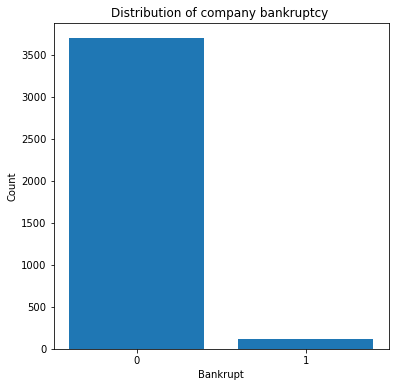

In [34]:
# Ploting class imbalance
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.bar([0,1],y_train.value_counts())
ax.set_xlabel('Bankrupt')
ax.set_ylabel('Count')
ax.set_xticks([0,1])
ax.set_title('Distribution of company bankruptcy ')
plt.show()

To improve our model's ability to pick up bankrupt companies, we must resample our data set. There are generally two ways to do this:
- Undersampling the majority class.
- Oversampling the minority class.

Here, we'll take a look at the latter option using a technique called Synthetic Minority Over-sampling Technique (SMOTE). For a more in depth treatment of this technique please refer [here](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).

To apply SMOTE, we'll have to use another library called Imbalanced Learn (imported as `imblearn`). To start, lets see how SMOTE resampling changes our class distribution:

In [35]:
# Importing SMOTE class from Imbalanced Learn
from imblearn.over_sampling import SMOTE

In [36]:
# Resampling data
sm = SMOTE(random_state=243)
X_res, y_res = sm.fit_sample(X_train, y_train)

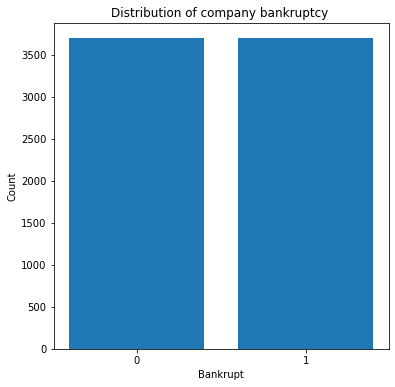

In [37]:
# Re-plotting class balance
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.bar([0,1],y_res.value_counts())
ax.set_xlabel('Bankrupt')
ax.set_ylabel('Count')
ax.set_xticks([0,1])
ax.set_title('Distribution of company bankruptcy ')
plt.show()

What is great about this library is that it is built to integrate with scikit learn, so we can just add the SMOTE transformer onto our Pipelines. The only caveat is that, to do this, we must import the `make_pipeline()` function from Imbalanced Learn (for documentation, see [here](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.make_pipeline.html)). Have a go at changing our Pipelines (add SMOTE resampling as the first step) and then use these to predict on our validation samples:
- Import the `make_pipeline()` function from imblearn.
- Make a pipeline for each estimator by passing the following transformers (in order): SMOTE, Scaling, PCA, estimator.
- Fit on the training set and predict on the validation set using all three pipelines.
- Print out the classification report for all three models. 

> **Note:** The `.make_pipeline()` function, unlike the method `Pipeline()`, does not require a list of tuples as an argument. Instead, just pass in whatever transformers and estimators you want in order (separated by commas.) 

In [38]:
# Importing make_pipeline
from imblearn.pipeline import make_pipeline

In [39]:
# Create three Pipelines, one for each model
knn_pipe = make_pipeline(SMOTE(random_state=253), StandardScaler(), PCA(n_components=30), KNeighborsClassifier())

svm_pipe = make_pipeline(SMOTE(random_state=253), StandardScaler(), PCA(n_components=30), SVC())

log_reg_pipe = make_pipeline(SMOTE(random_state=253), StandardScaler(), PCA(n_components=30), LogisticRegression()) 

In [40]:
# Fit and predict KNN pipeline
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_val)
print('KNN Classification Report:')
print(classification_report(y_val, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       920
           1       0.18      0.66      0.28        35

    accuracy                           0.88       955
   macro avg       0.58      0.77      0.61       955
weighted avg       0.96      0.88      0.91       955



In [41]:
# Fit and predict SVM pipeline
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_val)
print('SVM Classification Report:')
print(classification_report(y_val, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       920
           1       0.24      0.80      0.37        35

    accuracy                           0.90       955
   macro avg       0.62      0.85      0.66       955
weighted avg       0.96      0.90      0.93       955



In [42]:
# Fit and predict Logistic Regression pipeline
log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_val)
print('Logistic Regression Classification Report:')
print(classification_report(y_val, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       920
           1       0.21      0.83      0.33        35

    accuracy                           0.88       955
   macro avg       0.60      0.85      0.63       955
weighted avg       0.96      0.88      0.91       955



### Wrapping it all up

We're nearly there! Now its time to train our models using the whole initial training set (training + validation) to then predict on the test set:
- Merge the training and validation sets into a new training set (covered in previous sessions).
- Fit each model on the new training set.
- Predict with each model on the test set.
- Print out the classification report of your predictions.

In [43]:
# Merging together training and validation samples
X_train = X_train.append(X_val, ignore_index=True, sort=False)
y_train = y_train.append(y_val, ignore_index=True) 

In [44]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)

X_train dimensions:  (4773, 95)
y_train dimensions:  (4773,)


In [45]:
# Fit and predict KNN pipeline
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
print('KNN Classification Report:')
print(classification_report(y_test, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1981
           1       0.16      0.77      0.27        65

    accuracy                           0.87      2046
   macro avg       0.58      0.82      0.60      2046
weighted avg       0.96      0.87      0.91      2046



In [46]:
# Fit and predict SVM pipeline
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_test)
print('SVM Classification Report:')
print(classification_report(y_test, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1981
           1       0.18      0.69      0.29        65

    accuracy                           0.89      2046
   macro avg       0.59      0.80      0.62      2046
weighted avg       0.96      0.89      0.92      2046



In [47]:
# Fit and predict Logistic Regression pipeline
log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_test)
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1981
           1       0.15      0.75      0.25        65

    accuracy                           0.86      2046
   macro avg       0.57      0.81      0.58      2046
weighted avg       0.96      0.86      0.90      2046



### Taking it up a notch
With this, we come to the end of this project, although this does not mean that you're done by any means. The project explored today can be improved in many ways to achieve better results, and doing so is what will truly help you grow as a data scientist. Here are some suggestions for improvements to this particular project:
- **EDA:**
    - How are the features in our data set distributed?
    - What is the individual relationship of each of these with our target variable?
    
    
- **Dimentionality reduction:**
    - What number of components should we use to improve our predictions?
    - What other dimensionality reduction techniques are there? (Hint: have a look at manifold learning models like [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) 
    
    
- **Preprocessing:**
    - What other scaling methods are there? Which is the best for this problem?
    - Is there any feature engineering that we can do? How?
    - How do other resampling methods affect performance?
    
    
- **Modelling:**
    - What other classification models can you use?
    - Try out ensemble models: random forests, LightGBM XGBoost... which works out best?
    - Can you optimize any hyperparameters? How?
    
- **Evaluation Metrics:**
    - Try looking at the ROC curve and the associated AUC metric [(link here)](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5). Can you implement these in your project? 
    
    


## Regression: What are the drivers of worker productivity?
For this project, we will aim to predict the level of productivity for workers in the garment industry given a variety of production and supply chain metrics. To do this, we will use  data collected from January to March 2015 by the Industrial Engineering (IE) department of a garment manufacturing unit in
Bangladesh. This kind of model would have all sorts of real world applications within the fields of operational research, labour economics, and supply chain management.

### Data set overview

To start out, lets get an overview of our data set dimensions and feature types. We'll be doing a very simple overview in this section but feel free to perform more extensive EDA on your own: the more you know about your data, the better you can harness it through modelling.

Start out with the following tasks:
- Read in the data set as a pandas DataFrame (file path: `data/bankruptcy.csv`)
- Output the first ten data set rows
- Output the last ten data set rows
- Print out a comprehensive summary of the data set (dimensions, variable names, data types, and null values)

In [48]:
# Read bankruptcy data set
data  = pd.read_csv('data/garments_worker_productivity.csv')

In [49]:
# Output the first ten rows
data.head(10)

,date,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [50]:
# Output the last ten rows
data.tail(10)

,date,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1187,3/11/2015,Quarter2,sweing,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246
1191,3/11/2015,Quarter2,sweing,7,0.65,30.48,935.0,6840,26,0.0,0,1,57.0,0.650596
1192,3/11/2015,Quarter2,finishing,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,6,0.70,2.90,NaN,720,0,0.0,0,0,6.0,0.394722


In [51]:
# Print the data set overview (dimensions, variable names, data types, null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    691 non-null    float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 131.0+ 

### Feature engineering with dates

One of the features in our data set provides date information. In this format, the feature can be quite useless, but there are several things that we can do to extract useful information from it relating to worker productivity. To start, we want to convert the feature entries into `datetime` objects. To do this:
- Use the `pd.to_datetime()` function to reset the `'date'` column in our data set.
> **Note:** In order to get the right format, pass the argument `format = '%m/%d/%Y' `, and have a read [here](https://www.w3schools.com/python/python_datetime.asp) for further information on how to handle datetime objects.

In [52]:
# Converting 'date' column into datetime 
data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%Y' ) 

With our 'date' column in `datetime` format, we can now proceed to extract a number of additional features. Although you can find the full list of `datetime` attributes [here](https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties), we will focus on extracting the day of the week and the month as separate features. To extract a `datetime` attribute as a feature, we can use the following command:
- `data['<new_feature_label>'] = data['date'].dt.<attribute>`

Try extracting the attributes `.month` and `.dayofweek` and assigning it to columns with the labels `'month'` and `'day'` respectively:

In [53]:
# Creating month, day of the week,  feature
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.dayofweek

Lastly, we want to drop the `'date'` feature from our data set (as this can be hard to encode) and output the first ten rows of our data set and the data set overview to check the new features:

In [54]:
data = data.drop(columns='date')

In [55]:
# Output the first ten rows
data.head(10)

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,day
0,Quarter1,sweing,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,3
1,Quarter1,finishing,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,3
2,Quarter1,sweing,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,3
3,Quarter1,sweing,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,3
4,Quarter1,sweing,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,3
5,Quarter1,sweing,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,1,3
6,Quarter1,finishing,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167,1,3
7,Quarter1,sweing,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683,1,3
8,Quarter1,sweing,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098,1,3
9,Quarter1,sweing,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428,1,3


In [56]:
# Print the data set overview (dimensions, variable names, data types, null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   team                   1197 non-null   int64  
 3   targeted_productivity  1197 non-null   float64
 4   smv                    1197 non-null   float64
 5   wip                    691 non-null    float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   idle_men               1197 non-null   int64  
 10  no_of_style_change     1197 non-null   int64  
 11  no_of_workers          1197 non-null   float64
 12  actual_productivity    1197 non-null   float64
 13  month                  1197 non-null   int64  
 14  day                    1197 non-null   int64  
dtypes: f

### Dummy encoding

Now that we've extracted some new features from our date data, we want to encode all our features so that they're ready for machine learning modeling. This includes encoding all of our categorical features as 'dummy variables'. Whilst this may seem easy at first sight, check the unique values (using `.unique()`) for the following features: `'team'`, `'month'`, `'day'`. Do these seem like continuous or categorical variables to you?

In [57]:
# Checking unique values for 'team' 
data['team'].unique()

array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4])

In [58]:
# Checking unique values for 'month' 
data['month'].unique()

array([1, 2, 3])

In [59]:
# Checking unique values for 'day' 
data['day'].unique()

array([3, 5, 6, 0, 1, 2])

As we can see, these features, although of numerical data type, fall much better under the definition of categorical variables. Had we not noticed, they would not get dummy encoded by the `pd.get_dummies()` function, leading to the incorrect handling of our data. Thus, its important to always check what kind of features we have, irrespective if data type. We can get around this encoding problem by casting these features as `str` types and then proceeding with the dummy encoding. In our data set:
- Cast the features `'team'`, `'month'`, and `'day'` as strings.
- Use the `pd.get_dummies()` function to dummy encode categorical variables (Hint: remember to drop one dummy pre categorical feature using the `drop_first` parameter).

In [60]:
# Cast 'team', 'month', and 'day' features as str
data['team'] = data['team'].astype(str)
data['month'] = data['team'].astype(str)
data['day'] = data['day'].astype(str) 

In [61]:
# Generate dummy encoding
data = pd.get_dummies(data, drop_first=True)

In [62]:
# Print data set overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  1197 non-null   float64
 1   smv                    1197 non-null   float64
 2   wip                    691 non-null    float64
 3   over_time              1197 non-null   int64  
 4   incentive              1197 non-null   int64  
 5   idle_time              1197 non-null   float64
 6   idle_men               1197 non-null   int64  
 7   no_of_style_change     1197 non-null   int64  
 8   no_of_workers          1197 non-null   float64
 9   actual_productivity    1197 non-null   float64
 10  quarter_Quarter2       1197 non-null   uint8  
 11  quarter_Quarter3       1197 non-null   uint8  
 12  quarter_Quarter4       1197 non-null   uint8  
 13  quarter_Quarter5       1197 non-null   uint8  
 14  department_finishing   1197 non-null   uint8  
 15  depa

### Our ML setup
Now that we have our variables encoded we want to set up our data in the usual machine learning configuration: a training and a test set, each with a feature matrix and a target vector. To start:

- Import the `train_test_split()` function from scikit learn
- Declare a target vector y (corresponding to the `actual_productivity` column in the data set)
- Declare a feature matrix X (including all columns except `actual_productivity`)
- Create a training and test set
- Print the dimensions of X and y in both the training and test set.

In [63]:
# Importing train-test split function
from sklearn.model_selection import train_test_split

In [64]:
# Declare the training vector y which has the column label 'actual_productivity'
y = data.actual_productivity

In [65]:
# Declare feature matrix 
X = data.drop(columns='actual_productivity')

In [66]:
# Create a train-test- split using random state 253, test_size 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=253) 

In [67]:
# Print dimensions of the training set
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)

X_train dimensions:  (837, 42)
y_train dimensions:  (837,)


In [68]:
# Print dimensions of the test set
print('X_test dimensions: ', X_test.shape)
print('y_test dimensions: ', y_test.shape)

X_test dimensions:  (360, 42)
y_test dimensions:  (360,)


### Missing value imputation

As you probably already noticed, we have several missing values in the `'wip'` column of our data set. This time, however, we will use a more advanced method to impute missing values. More specifically, we will use the K Nearest Neighbors algorithm to impute values that are similar to other nearby samples, which should hopefully give us more accuracy. To do this:
- Import the `KNNImputer` class from scikit learn
- Create `KNNImputer` transformer, passing `n_neighbors=7` as an argument.
- Fit the transformer using `X_train`
- Impute missing values by calling the `.transform()` method with `X_train` as an argument. Assign this to a new variable `X_full`.

In [69]:
# Importing KNNImputer
from sklearn.impute import KNNImputer

In [70]:
# Creating KNNImputer transformer
imputer = KNNImputer(n_neighbors=7)

In [71]:
# Fitting and transforming training feature matrix using our imputer
X_train.info()
print('')
imputer.fit(X_train)
X_full = imputer.transform(X_train) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 1116 to 779
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  837 non-null    float64
 1   smv                    837 non-null    float64
 2   wip                    485 non-null    float64
 3   over_time              837 non-null    int64  
 4   incentive              837 non-null    int64  
 5   idle_time              837 non-null    float64
 6   idle_men               837 non-null    int64  
 7   no_of_style_change     837 non-null    int64  
 8   no_of_workers          837 non-null    float64
 9   quarter_Quarter2       837 non-null    uint8  
 10  quarter_Quarter3       837 non-null    uint8  
 11  quarter_Quarter4       837 non-null    uint8  
 12  quarter_Quarter5       837 non-null    uint8  
 13  department_finishing   837 non-null    uint8  
 14  department_sweing      837 non-null    uint8  
 15  tea

### Pipelines

You might've noticed that most machine learning with scikit learn involves:
- Instantiating a transformer or model.
- Fitting this to our data using `.fit()`.
- Transforming or predicting using `.transform()` or `.predict()`.

This simple, general process means that we can simplify our ML process using **Pipelines**. A Pipeline allows you to establish a sequence of transformations terminating with *one estimator*. Pipelines can then be treated as any other scikit learn estimator, but each time they perform all of the interim transformation steps in the sequence. This has the benefit of greatly simplifying your code and can also help prevent [data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/). 

To instantiate a Pipeline you must pass as an argument a list of $n+1$ tuples (where $n$ is the number of transforms) in the form: `[('transformer_1_name', transformer_1), ..., ('estimator_name', estimator)]`.

We will now create Pipelines for both an SVM and a Linear Regression model below:
- Import the `StandardScaler`, `SVR`, and `LinearRegression` classes from scikit learn.
- Import the `Pipeline` class from scikit learn.
- For each one of the two models, create a Pipeline with the following transforms (in order): imputation, scaling, estimator.

In [72]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [73]:
# Importing KNN, SVM, and Linear Regression models 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


In [74]:
# Importing Pipeline
from sklearn.pipeline import Pipeline

In [75]:
# Combine these into two Pipelines, one for each model
lin_reg_pipe = Pipeline([('Imputation', KNNImputer(n_neighbors=7)), 
                         ('Scaler', StandardScaler()), 
                         ('Model', LinearRegression())])

svm_pipe = Pipeline([('Imputation', KNNImputer(n_neighbors=7)), 
                     ('Scaler', StandardScaler()), 
                     ('Model', SVR())])


Now we want to see how well our models stack up! For regression problems, one metric that is often used to assess model performance is the **Root Mean Squared Error (RMSE)**. this is given by:
$$\text{RMSE}=\sqrt{\frac{\sum_{i=1}^n (\,y_i\,-\,y_i^{pred}\,)^2}{n}}$$

We can compare our models by computing the cross-validated RMSE scores:
- Import the `cross_val_score()` function from scikit learn.
- Calculate the cross-validated scores for each pipeline estimator. 
- Print the mean score for each pipeline estimator.
> **Note:**  Pass `scoring = 'neg_root_mean_squared_error'` as an argument to `cross_val_score()` to ensure that it computes the RMSE for all models.

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
# Calculate the cross-validated score of these two models
lin_reg_score = cross_val_score(lin_reg_pipe, X_train, y_train, scoring = 'neg_root_mean_squared_error').mean()
svm_score = cross_val_score(svm_pipe, X_train, y_train, scoring = 'neg_root_mean_squared_error').mean() 

In [78]:
print('Linear Regression RMSE Score:')
print((-1)*lin_reg_score)

Linear Regression RMSE Score:
0.14902350674590664


In [79]:
print('SVM RMSE Score:')
print((-1)*svm_score)

SVM RMSE Score:
0.15370941286191125


### Regularization

We will now learn about a more advanced technique called **regularization** that can help us build better regression models. Regularization is an adaptation on the standard linear regression and essentially works by placing a penalty on the size of the regression coefficients when fitting. This is because large coefficients tend to overfit our model to the training data, so by shrinking them we enable the model to generalize better and improve performance on unseen data. A more detailed description of regularization can be found [here](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a). 

We will focus on one particular kind of regularized regression model known as **Ridge regression**. One key aspect of ridge regression is the `alpha` hyperparameter, which is used to denote the strength of the penalty on coefficient size. A larger value of`alpha` will seek to shrink coefficients more and viseversa. Finding the optimal `alpha` value can be cumbersome, but luckily we can use the hyperparameter optimization techniques learned in Session Five to do this. 

Lets try out using a Ridge model for our productivity problem:
- Import the `Ridge` and `GridSearchCV` classes from scikit learn
- Create a Pipeline with the following transforms (in order): imputation, scaling, Ridge estimator.
- Create a `GridSearchCV` object by passing our Ridge pipeline, and the dictionary `params`.
- Fit the `GridSearchCV` object using `X_train` and `y_train`.
- Print the optimal `alpha` value using the `.best_params_` attribute on our `GridSearchCV` object.
- Print the best RMSE score using the `.best_score_` attribute on our `GridSearchCV` object.
- Assign the optimized model to `ridge_pipe` using the `.best_estimator_` attribute on our `GridSearchCV` object.
> **Note:**  Pass `scoring = 'neg_root_mean_squared_error'` as an argument to `GridSearchCV()` to ensure that it computes the RMSE for our Ridge model.

In [80]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [81]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [82]:
# Creating Ridge Pipeline
ridge_pipe = Pipeline([('Imputation', KNNImputer(n_neighbors=7)), 
                       ('Scaler', StandardScaler()), 
                       ('Model', Ridge())])

In [83]:
params = {'Model__alpha':np.linspace(0, 1, 40)}

In [84]:
# Optimizing alpha hyperparameter using GridSearchCV
grid_search = GridSearchCV(ridge_pipe, params, scoring = 'neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('Best Alpha: ', grid_search.best_params_)
print('RMSE: ', grid_search.best_score_)

Best Alpha:  {'Model__alpha': 0.02564102564102564}
RMSE:  -0.1503531278644371


In [85]:
ridge_pipe = grid_search.best_estimator_

### Wrapping it all up

We're nearly there! Now its time to train our models using the whole initial training set to then predict on the test set:
- Import the `mean_squared_error()` function from scikit learn
- Fit each model on the training set.
- Predict with each model on the test set.
- Print out the RMSE of your predictions using mean_squared_error(). 

> **Note**: To get the RMSE instead of the MSE, just pass `squared=False` as an argument.

In [86]:
# Importing mean_squared_error
from sklearn.metrics import mean_squared_error

In [87]:
# Fit and predict Linear Regression pipeline
lin_reg_pipe.fit(X_train, y_train)
y_pred = lin_reg_pipe.predict(X_test)
print('Linear Regression RMSE:')
print(mean_squared_error(y_test, y_pred, squared=False))

Linear Regression RMSE:
0.15580056435830356


In [88]:
# Fit and predict SVM pipeline
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_test)
print('SVM RMSE:')
print(mean_squared_error(y_test, y_pred, squared=False))

SVM RMSE:
0.15754021468425466


In [89]:
# Fit and predict Ridge pipeline
ridge_pipe.fit(X_train, y_train)
y_pred = ridge_pipe.predict(X_test)
print('Ridge RMSE:')
print(mean_squared_error(y_test, y_pred, squared=False))

Ridge RMSE:
0.15578688255725753
